# 5. Capstone Project: Machine Learning Models IV

***

![headerall](./images/headers/header_all.jpg)

##  Goals

### Project:
In this work, we will first analyze where and when traffic congestion is highest and lowest in New York State. We will then build different machine learning models capable of predicting cab travel times in and around New York City using only variables that can be easily obtained from a smartphone app or a website. We will then compare their performance and explore the possibility of using additional variables such as weather forecasts and holidays to improve the predictive performance of the models.

### Section:
In this section, we will use the knowledge gained during the exploratory data analysis to perform the final feature transformation. Next, we will create and compare the performance of several machine learning models, namely: linear regressions, a support vector machine regressor, a random forest regressor and a gradient boosted decision tree. The feature space and hyperparameters will be optimised for each model to obtain the best possible performance.

## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***
## Table of Content:
    1. Data Preparation
        1.1 External Datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
            1.2.2 Taxi Trips Subset
    2. Exploratory Data Analysis
        2.1 Primary Dataset
            2.1.1 Temporal Analysis
            2.1.2 Spatio-Temporal Analysis
        2.2 External Datasets
            2.2.1 Temporal Analysis of Weather Data
            2.2.2 Temporal Analysis of Holidays Data
        2.3 Combined Dataset
            2.3.1 Overall Features Correlation
    3. Machine Learning Models
        3.1 Data Preparation
        3.2 Baselines
        3.3 Model Training
            3.3.1 Linear Regression
            3.3.2 Support Vector Machine
            3.3.3 Random Forest
            3.3.4 Gradient Boosted Decision Tree
        3.4 Final Models Comparison
    4. Conclusions

***
## Python Libraries and Magic Commands Import

In [1]:
# Import python core libraries
import os

# Import data processing libraries gpd
import pandas as pd
import numpy as np

# Import Visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set up magic commands
%matplotlib inline
%config Completer.use_jedi = False

***

## Data Import

In [3]:
# Import the results data frames
results = [pd.read_csv(os.path.join("results", f)) for f in os.listdir("results")]

# Concatenate and sort the results data frame
results = pd.concat(results, ignore_index=True).sort_values("mse", ascending=False).reset_index()

***
## Functions Import

In [4]:
# Define a function that display individual barplot
def plot_barplot(
    data,
    x_var,
    y_var,
    xlabel,
    ylabel,
    title="",
    labels=None,
    label_order=None,
    legend=None,
    figsize=(20, 5),
    palette="YlGnBu",
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    if labels == None:
        sns.barplot(
            x=x_var,
            y=y_var,
            data=data,
            ax=ax,
            palette=palette,
        )
    else:
        sns.barplot(
            x=x_var,
            y=y_var,
            hue=labels,
            hue_order=label_order,
            data=data,
            ax=ax,
            palette=palette,
        )
        ax.legend(title=legend)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)
    
    # Display the figure
    plt.show()

***
## 3.4 Final Models Comparison

## Goals:
Compare the performance of the various machine learning models

## Code:

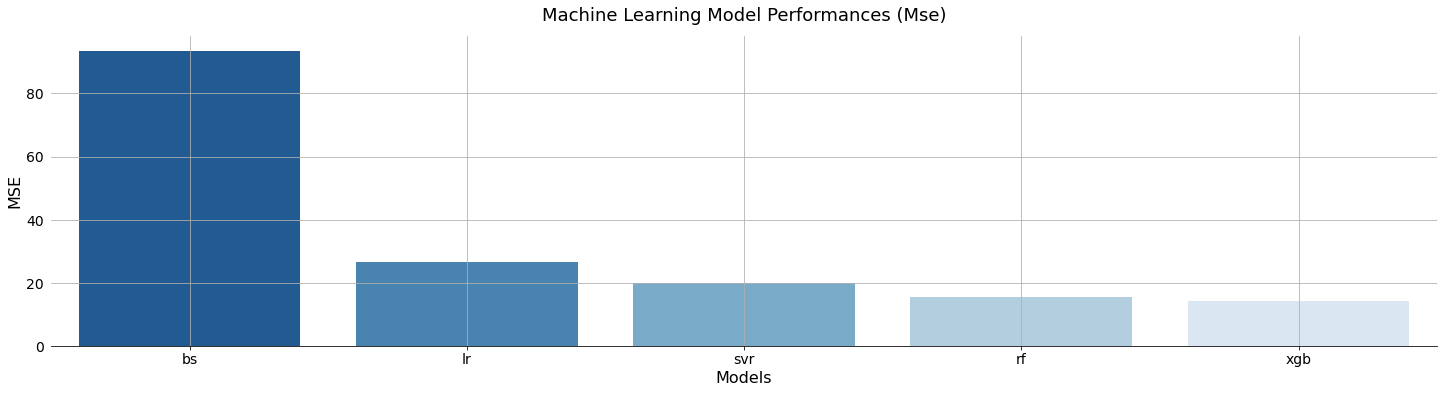

In [12]:
# Display a bar plot of the ML model performances
plot_barplot(
    results,
    "model",
    "mse",
    "Models",
    "MSE",
    title="Machine Learning Model Performances (MSE)",
    figsize=(20, 5),
    palette="Blues_r"
)

**Notes:** All machine learning models performed well above the average baseline. The gradient boosted decision tree shows the best performance, followed closely by the random forest regressor. The support vector machine regressor performed much better than the linear regression models, but significantly worse than the tree-based models.

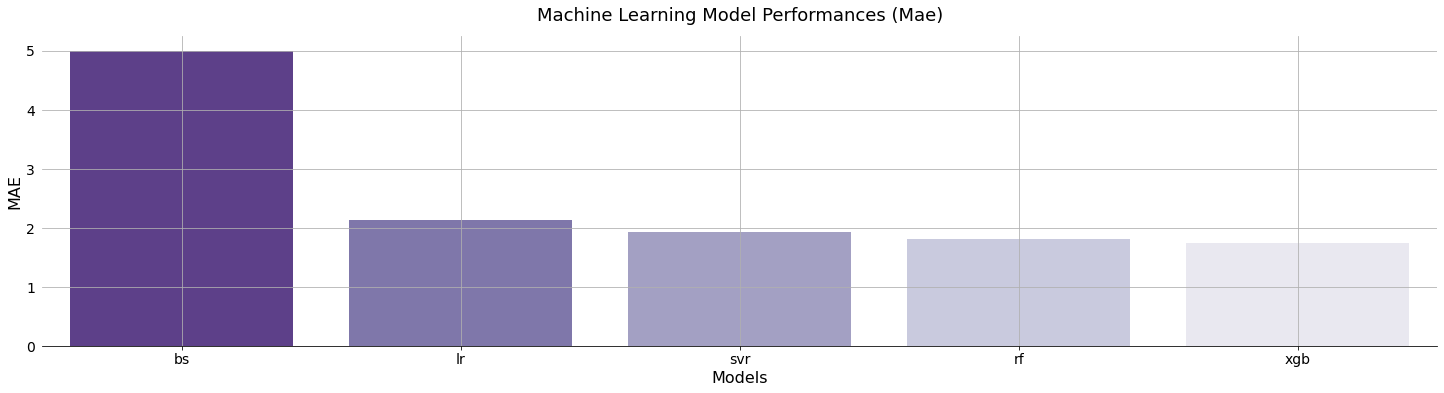

In [18]:
# Display a bar plot of the ML model performances
plot_barplot(
    results,
    "model",
    "mae",
    "Models",
    "MAE",
    title="Machine Learning Model Performances (MAE)",
    figsize=(20, 5),
    palette="Purples_r"
)

**Notes:** All machine learning models performed well above the median baseline. The gradient boosted decision tree shows the best performance, closely followed by the random forest regressor. The support vector machine regressor performed better than the linear regression models, but sligthly worse than the tree-based models.